**Project Description:**
Analyzed Olympic data by importing necessary libraries, cleaning the dataset, and creating visualizations to uncover insights on medal trends, country performances, and athlete's performances over time.

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read csv file of dataset

data = pd.read_csv("/content/Summer-Olympic-medals-1976-to-2008.csv",encoding='latin1')
data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [ ]:
#shape of dataset
data.shape

(15433, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [ ]:
data.describe(include='all')

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
count,15316,15316.000000,15316,15316,15316,15316,15316,15316,15316,15316,15316
unique,9,NaN,28,41,293,11337,2,128,127,3,3
top,Beijing,NaN,Aquatics,Athletics,hockey,"PHELPS, Michael",Men,USA,United States,M,Bronze
freq,2042,NaN,2210,1523,817,16,9388,1992,1992,8817,5258
mean,NaN,1993.620789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,10.159851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1976.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1984.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1996.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#data preprocessing

In [ ]:
#check for missing values
data.isnull().sum()

,0
City,117
Year,117
Sport,117
Discipline,117
Event,117
Athlete,117
Gender,117
Country_Code,117
Country,117
Event_gender,117


In [ ]:
#dropping null values
data.dropna(how='all', inplace=True)

In [ ]:
#again checking for null values after dropping them
data.isnull().sum()

,0
City,0
Year,0
Sport,0
Discipline,0
Event,0
Athlete,0
Gender,0
Country_Code,0
Country,0
Event_gender,0


In [ ]:
#shape of dataset after dropping null values
print('Shape of dataset after dropping null values', data.shape)

Shape of dataset after dropping null values (15316, 11)


In [ ]:
#check for duplicates
data.duplicated().sum()

np.int64(1)

In [ ]:
#remove duplicates
data.drop_duplicates(inplace=True)

In [ ]:
#again check for duplicates
data.duplicated().sum()

np.int64(0)

In [ ]:
#dataset shape after dropping duplicates
data.shape

(15315, 11)

In [ ]:
#convert dtype of date from float to int
data['Year'] = data['Year'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15315 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          15315 non-null  object
 1   Year          15315 non-null  int64 
 2   Sport         15315 non-null  object
 3   Discipline    15315 non-null  object
 4   Event         15315 non-null  object
 5   Athlete       15315 non-null  object
 6   Gender        15315 non-null  object
 7   Country_Code  15315 non-null  object
 8   Country       15315 non-null  object
 9   Event_gender  15315 non-null  object
 10  Medal         15315 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.4+ MB


In [ ]:
# data visualizations

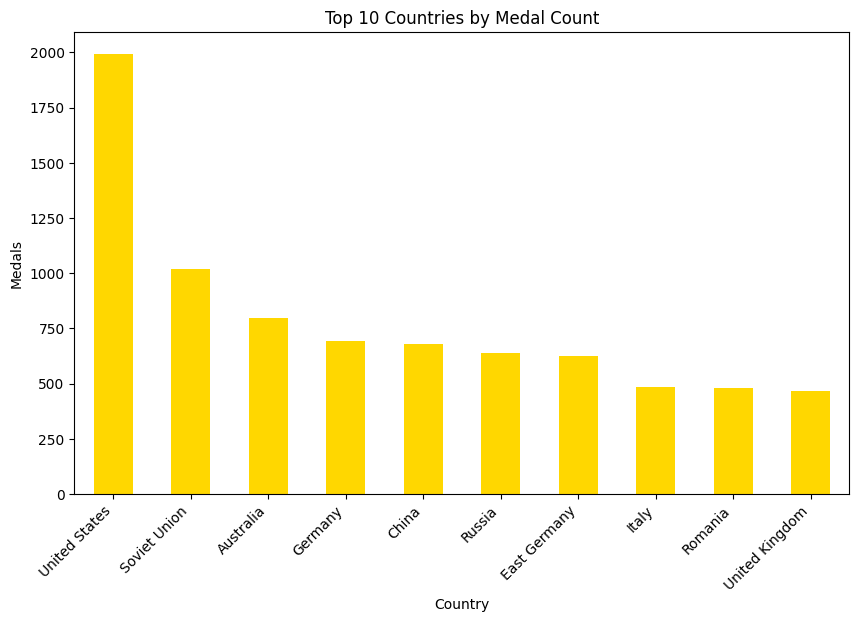

In [ ]:
# Total medals by country
medals_by_country = data.groupby('Country')['Medal'].count().sort_values(ascending=False)
plt.figure(figsize=(10,6))
medals_by_country.head(10).plot(kind='bar',color='gold')
plt.title("Top 10 Countries by Medal Count")
plt.xlabel("Country")
plt.ylabel("Medals")
plt.xticks(rotation=45, ha='right')
plt.show()

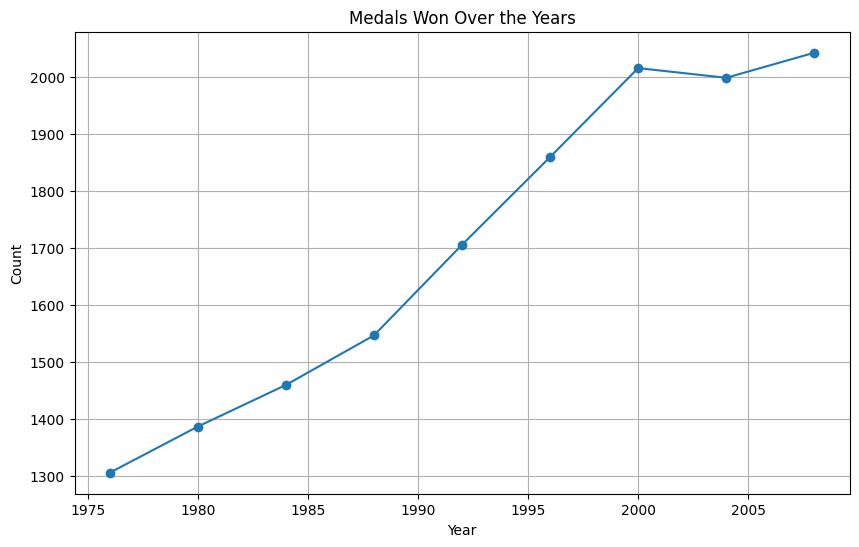

In [ ]:
#medals over the years
medals_over_years = data.groupby('Year')['Medal'].count()
plt.figure(figsize=(10,6))
plt.plot(medals_over_years.index, medals_over_years.values, marker='o')
plt.title("Medals Won Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [ ]:
# city that hosted maximum number of olympics
data1 = data[['City','Year']]
data1 = data1.drop_duplicates('Year')
print('Cities that hosted maximum number of olympics: \n',data1)

Cities that hosted maximum number of olympics: 
               City  Year
0         Montreal  1976
1422        Moscow  1980
2809   Los Angeles  1984
4268         Seoul  1988
5814     Barcelona  1992
7519       Atlanta  1996
9378        Sydney  2000
11393       Athens  2004
13391      Beijing  2008


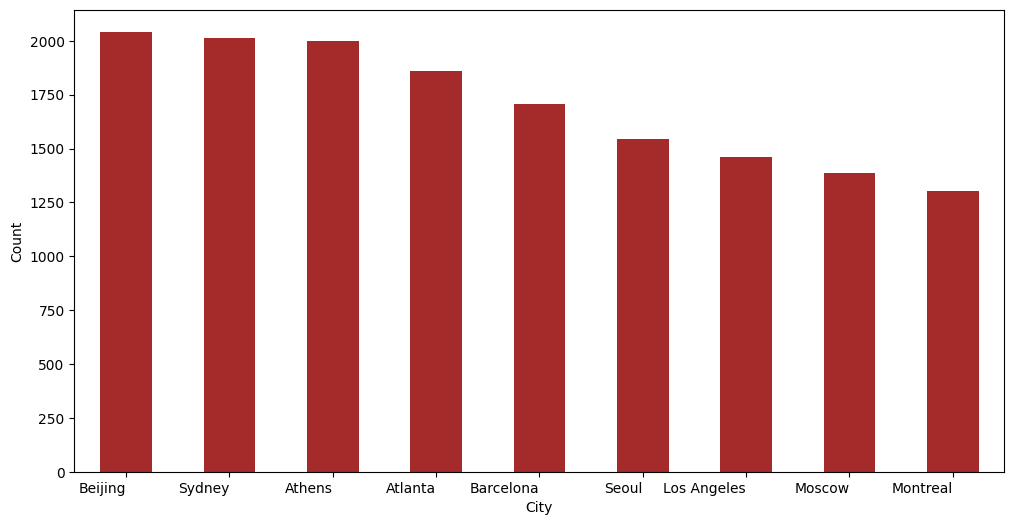

In [ ]:
#city that hosted most events.
data2 = data['City'].value_counts()
data2.columns = ['City','Count']
plt.figure(figsize=(12,6))
data2.plot(kind='bar',x = 'City', y = 'Count',color='brown')
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=0, ha='right')
plt.show()

In [ ]:
#events
data3 = data[['Sport','Discipline','Event']].drop_duplicates()
print("Total number of unique events are held so far are:",len(data3))
data3

Total number of unique events are held so far are: 334


,Sport,Discipline,Event
0,Aquatics,Diving,3m springboard
4,Aquatics,Diving,10m platform
12,Aquatics,Swimming,4x100m freestyle relay
13,Aquatics,Swimming,400m freestyle
15,Aquatics,Swimming,1500m freestyle
...,...,...,...
15016,Sailing,Sailing,Laser Radial - One Person Dinghy
15020,Sailing,Sailing,Finn - Heavyweight Dinghy
15026,Sailing,Sailing,Laser - One Person Dinghy
15029,Sailing,Sailing,RS:X - Windsurfer


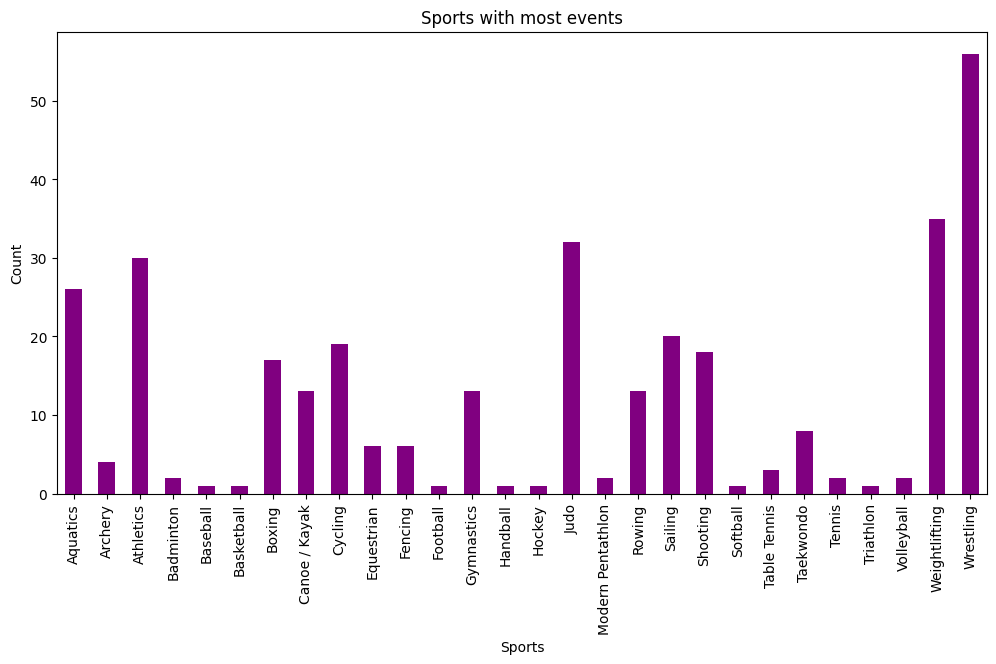

In [ ]:
data3 = data3.groupby(['Sport'])['Sport'].size()
plt.figure(figsize = (12,6))
data3.plot(kind='bar',x = 'Sport', y = 'Count',color='purple')
plt.title("Sports with most events")
plt.xlabel('Sports')
plt.ylabel('Count')
plt.show()

Top 10 athletes with the most medals:
Athlete
PHELPS, Michael        16
ANDRIANOV, Nikolay     12
TORRES, Dara           12
NEMOV, Alexei          12
FISCHER, Birgit        12
THOMPSON, Jenny        12
COUGHLIN, Natalie      11
BIONDI, Matthew        11
DITYATIN, Aleksandr    10
LEWIS, Carl            10
Name: count, dtype: int64


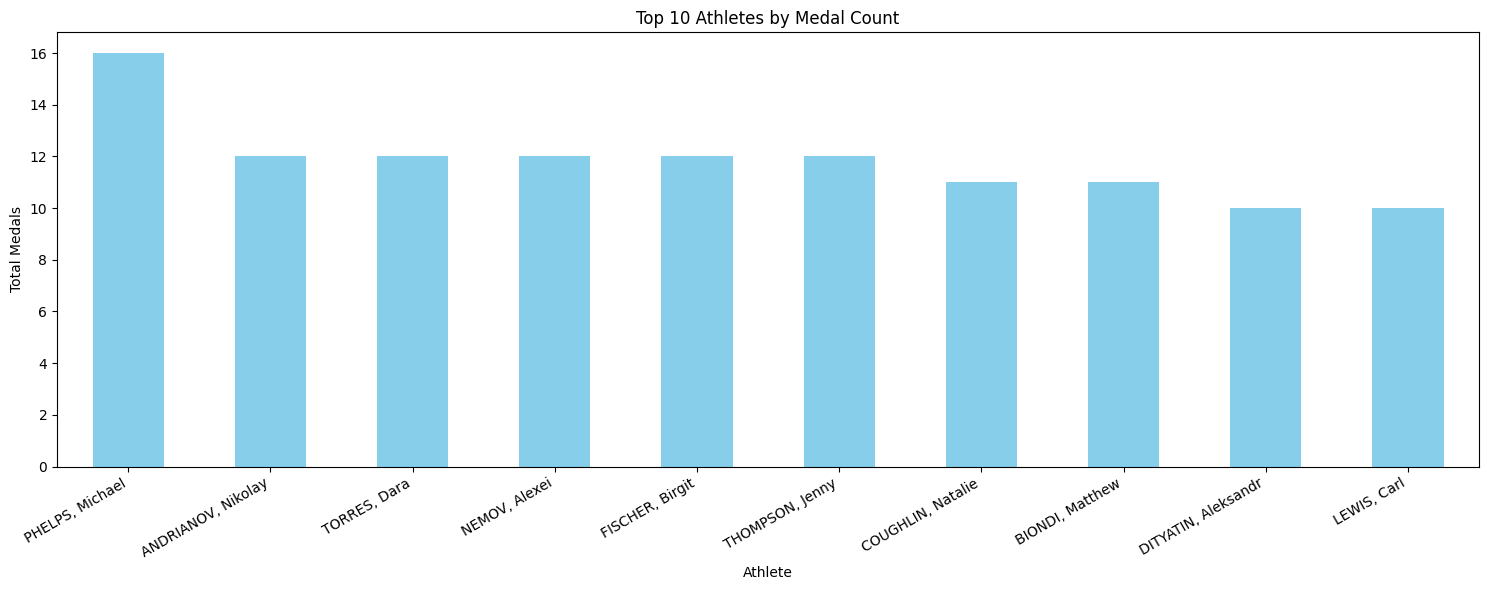

In [ ]:
# Top 10 athletes by medal count
top_10_athletes = data['Athlete'].value_counts().head(10)

# Display the top 10
print("Top 10 athletes with the most medals:")
print(top_10_athletes)

plt.figure(figsize=(15, 6))
top_10_athletes.plot(kind='bar', color='skyblue')
plt.title("Top 10 Athletes by Medal Count")
plt.xlabel("Athlete")
plt.ylabel("Total Medals")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


Medal count by gender:
Gender
Men      9387
Women    5928
Name: count, dtype: int64


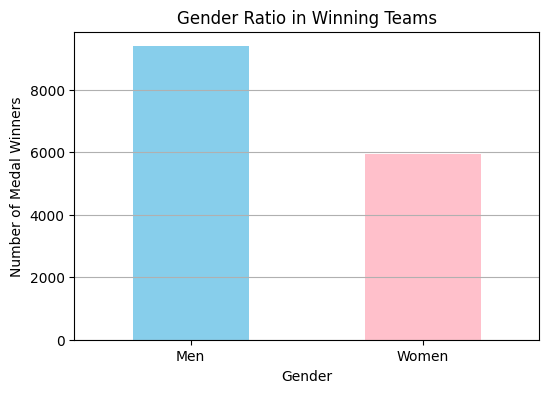

In [ ]:
# Count medals by gender
gender_counts = data['Gender'].value_counts()

# Display counts
print("Medal count by gender:")
print(gender_counts)

plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=['skyblue', 'pink'])
plt.title("Gender Ratio in Winning Teams")
plt.xlabel("Gender")
plt.ylabel("Number of Medal Winners")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



In [ ]:
# events, gender and count
data5 = data[['Event', 'Gender']]
data5 = data5.groupby(['Event','Gender'])['Gender'].count()
data5

#there is a huge difference in no of male winners and female winners implying no of sporting event for male are more than for female

Event                               Gender
+ 100kg (heavyweight)               Men        16
+ 100kg (super heavyweight)         Men        18
+ 105kg                             Men         9
+ 108kg, total (super heavyweight)  Men         3
+ 110kg, total (super heavyweight)  Men        15
                                             ... 
water polo                          Women     117
épée individual                     Men        27
                                    Women      12
épée team                           Men       114
                                    Women      30
Name: Gender, Length: 379, dtype: int64

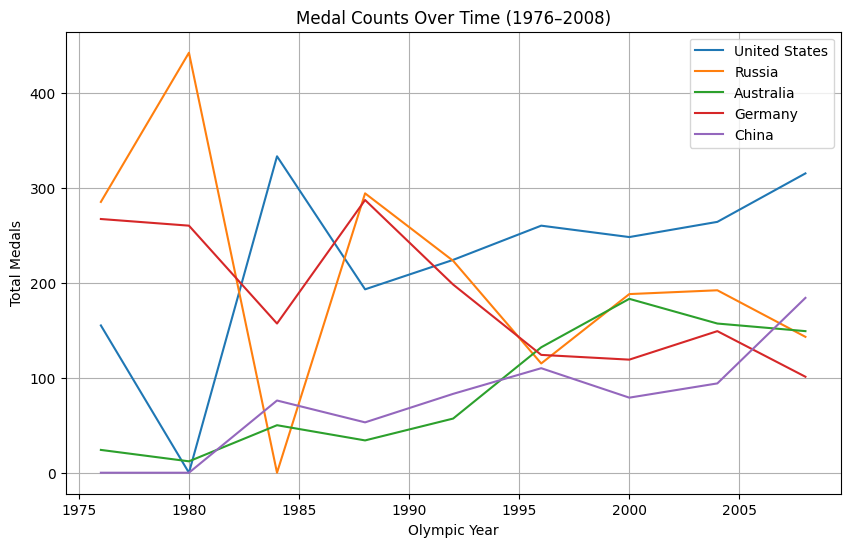

In [ ]:
# Create the summary of medals per Year and Country
df = data[['Year', 'Country', 'Medal']].copy()
df = df.dropna()

# Count medals per Year & Country
medal_counts = df.groupby(['Year', 'Country'])['Medal'].count().reset_index(name='Total')

# Pivot table with Years as rows, Countries as columns
pivot = medal_counts.pivot(index='Year', columns='Country', values='Total').fillna(0)

# Merge country variants manually
pivot['Germany'] = pivot.get('Germany', 0) + pivot.get('West Germany', 0) + pivot.get('East Germany', 0)
pivot['Russia'] = pivot.get('Russia', 0) + pivot.get('Soviet Union', 0) + pivot.get('Unified team', 0)

# Select countries to plot
selected_countries = ['United States', 'Russia', 'Australia', 'Germany','China']
plot_data = pivot[selected_countries]

# Plotting
plt.figure(figsize=(10, 6))
for country in selected_countries:
    plt.plot(plot_data.index, plot_data[country], label=country)

plt.title("Medal Counts Over Time (1976–2008)")
plt.xlabel("Olympic Year")
plt.ylabel("Total Medals")
plt.legend()
plt.grid(True)
plt.show()